# Gaussianness
****

In [1]:
import corner
from dynesty import NestedSampler, utils
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

In [2]:
#%matplotlib notebook
π = np.pi
Colour = plt.style.use('tableau-colorblind10')

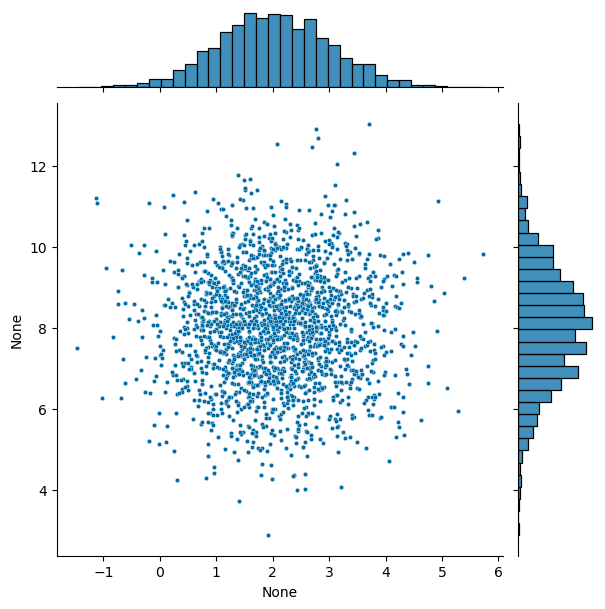

In [3]:
μ = [2, 8]
σ = [1, 2]
Σ = np.diag(σ)
No = [1200, 2000]
Mix = No[1]/(No[0]+No[1])
Data = np.random.multivariate_normal(μ, Σ, No[1])

g = sns.jointplot(x=Data[:,0], y=Data[:,1], joint_kws={'s': 10})

In [23]:
def Model(x, p):
    #G = np.exp(-x[:, 0]**2 - x[:, 1]**2)
    return p

def logLikelihood(p, x):
    p = Model(x, p)
    μ1, σ1, μ2, σ2 = p
    logPDF1 = norm.logpdf(x, loc=μ1, scale=σ1)
    logPDF2 = norm.logpdf(x, loc=μ2, scale=σ2)
    logPDF = np.logaddexp(logPDF1, logPDF2)
    
    return sum(logPDF)

Busy life, moving on

In [18]:
def UltraMagnus(u):
    x = np.array(u)
    x[0] = 2*x[0] + 1
    x[1] = 1*x[1] + 0.2
    x[2] = 2*x[2] + 7
    x[3] = 2*x[3] + 0.2
    
    return x

In [42]:
Sampler = NestedSampler(logLikelihood, UltraMagnus, ndim=4, logl_args=[Data[:, 0]], nlive=200)

Sampler.run_nested()

Results = Sampler.results

4034it [00:31, 128.39it/s, +200 | bound: 53 | nc: 1 | ncall: 23762 | eff(%): 17.970 | loglstar:   -inf < -2596.155 <    inf | logz: -2614.707 +/-  0.289 | dlogz:  0.001 >  0.209]


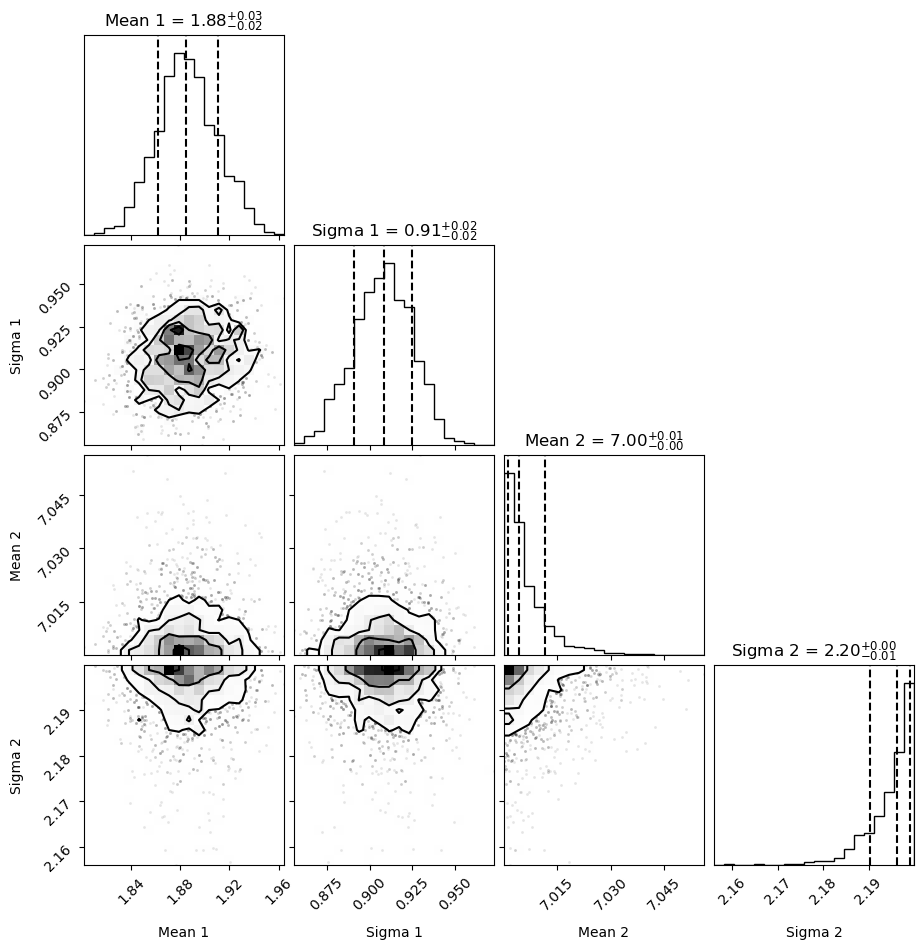

In [43]:
Samples = Results.samples_equal()
corner.corner(Samples, quantiles=[0.16, 0.5, 0.84], show_titles=True, labels=['Mean 1', 'Sigma 1', 'Mean 2', 'Sigma 2']);

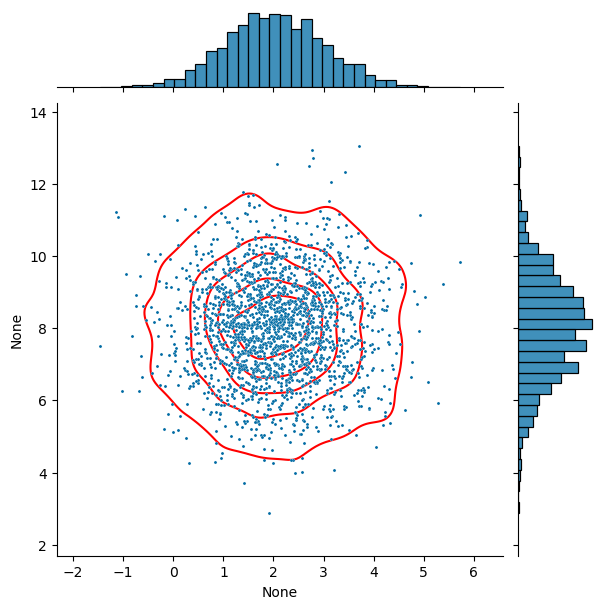

In [37]:
g = sns.jointplot(x=Data[:,0], y=Data[:,1], joint_kws={'s': 5})
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

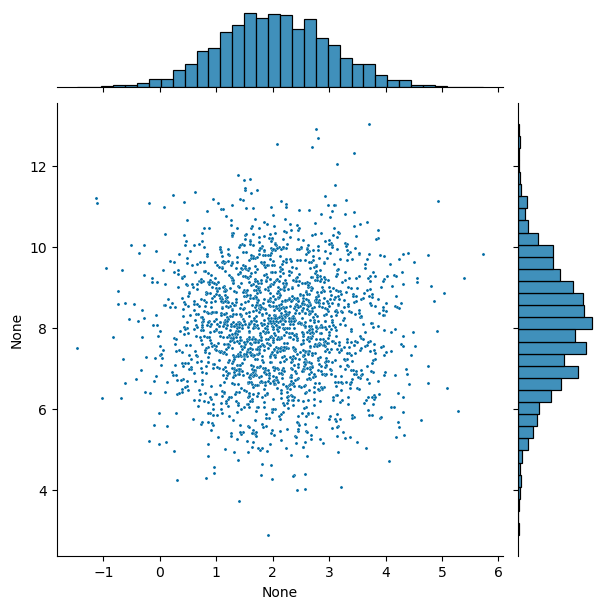

In [49]:
g = sns.jointplot(x=Data[:,0], y=Data[:,1], joint_kws={'s': 5})